# 오차역전파법

## 계산 그래프
- 오르쪽으로 진행하는 것을 순전파 forward propagation 
- 반대의 경우는 backward propagation --> 이후 미분 계산시 중요한 역할<br>
![](img/036.jpg)

### 국소적 계산
- 계산 그래프 방식은 국소적 계산들을 통해 원하는 값을 없는다.
- 자신과 관계된 정보만으로 결과를 출력 가능
- 복잡한 다른 문제는 신경 쓸 필요가 없다 
<br>  

### 왜 계산 그래프인가?
- 복잡한 문제를 노드 단위로 단순화 
- 중간 계산결과 저장가능 
- 미분의 효율적 계산 (!)
<br>

![](img/037.jpg)
<br>
## 연쇄법칙 chain rule
- 국소적 미분의 전달 원리 
<br>

### 계산 그래프의 역전파
<br> 

![](img/038.jpg)
<br>
역전파를 통해 미분 값을 효율적으로 구할 수 있다.

### 연쇄법칙이란
- 합성함수 : 2개 이상의 함수로 구성된 함수
- 합성함수의 미분은, 합성함수를 구분하는 각 함수의 미분의 곱으로 나타낼 수 있다. 
dz/dx = dz/dt * dt/dx <br>

### 연쇄법칙과 계산 그래프
<br>

![](img/039.jpg)
![](img/040.jpg)
<br>
역전파는 연쇄법칙의 원리와 같다
<br>

## 역전파 구현

In [1]:
# 곱셈 계층 구현

class MulLayer:
    def __init__(self):
        self.x = None
        self.y = None
        
    def forward(self, x, y): #순전파
        self.x = x
        self.y = y
        out = x*y
        
        return out
        
    def backward(self, dout):
        dx = dout * self.y # x와 y를 바꾼다. --> x*y의 경우 
        dy = dout * self.x
        
        return dx, dy

![](img/041.jpg)

In [4]:
apple = 100.0
apple_num = 2.0
tax = 1.1

#계층
mul_apple_layer = MulLayer() # 사과 가격 * 사과개수
mul_tax_layer = MulLayer() # 총 비용 * 세금비율

#순전파
apple_price = mul_apple_layer.forward(apple, apple_num)
price = mul_tax_layer.forward(apple_price, tax)

price

220.00000000000003

In [7]:
#역전파
dprice = 1
dapple_price, dtax = mul_tax_layer.backward(dprice)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)

dtax ,dapple_num ,dapple

(200.0, 110.00000000000001, 2.2)

In [8]:
# 덧샘 계층 구현
class AddLayer:
    def __init__(self):
        pass
    
    def forward(self,x,y):
        out = x + y 
        return out
    
    def backward(self, dout):
        dx = dout*1
        dy = dout*1
        return dx,dy

![](img/042.jpg)

In [9]:
apple = 100
apple_num = 2
orange = 150
orange_num = 3
tax = 1.1

#레이어 정의
mul_apple_layer = MulLayer()
mul_orange_layer = MulLayer()
add_apple_orange_layer = AddLayer()
mul_tax_layer = MulLayer()

#순전파
apple_price = mul_apple_layer.forward(apple, apple_num)
orange_price = mul_orange_layer.forward(orange, orange_num)
apple_orange_price = add_apple_orange_layer.forward(apple_price, orange_price)
price = mul_tax_layer.forward(apple_orange_price,tax)

price


715.0000000000001

In [11]:
#역전파
dprice = 1
dapple_orange_price, dtax = mul_tax_layer.backward(dprice)
dapple_price, dorange_price = add_apple_orange_layer.backward(dapple_orange_price)

dapple, dapple_num = mul_apple_layer.backward(dapple_price)
dorange, dorange_num = mul_orange_layer.backward(dorange_price)

dtax, dapple_num, dapple, dorange_num, dorange

(650, 110.00000000000001, 2.2, 165.0, 3.3000000000000003)

## 활성화 함수 계층 구현하기

### ReLU 계층 
![](img/043.jpg) <br>
![](img/044.jpg)

In [20]:
# ReLU 순전파 역전파 구현
# forward / backward 는 넘파이 배열을 인수로 받음
class Relu:
    def __init__(self):
        self.mask = None
        
    def forward(self,x):
        self.mask = (x<=0)
        out = x.copy()
        out[self.mask] = 0 # x<=0 조건에서는 해당인자 1 출력 // 이외 조건은 해당항목 0 출력
        return out
    
    def backward(self, dout):
        dout[self.mask] = 0
        dx = dout
        return dx
        

In [22]:
import numpy as np
x = np.array([[1,-.5],[-2,3]])
mask = (x<=0)
print(x)
print(mask)
x[mask] # True인 항목만 남기게 된다

[[ 1.  -0.5]
 [-2.   3. ]]
[[False  True]
 [ True False]]


array([-0.5, -2. ])

### Sigmoid 계층
![](img/045.jpg)

- y = 1/x 미분  : dy/dx = -1/x^2 = -y^2
- y= exp(x) : dy/dx = exp(x)

![](img/046.jpg)
<br>

![](img/047.jpg)
<br>

간소화를 통해 입력, 출력 에만 집중 할 수있다 

![](img/048.jpg)

In [25]:
# sigmoid 계층 구현 
class Sigmoid:
    def __init__(self):
        self.out = None
        
    def forward(self,x):
        out = 1/(1+np.exp(-x))
        self.out = out
        return out
    
    def backward(self, dout):
        dx = dout * (1.0 - self.out) * self.out        
        return dx
    
    #순전파 출력을 out변수에 보관 / 역전파 계산시 사용함

## Affine/Softmax 계층 구현

![](img/049.jpg)

![](img/050.jpg)

![](img/051.jpg)

![](img/052.jpg)

행렬의 형상에 주의하자

### 배치용 Affine 계층 : 데이터 N개를 묶어 전파하는 경우 

![](img/053.jpg)

In [26]:
#편향은 개별 데이터에 각각 더해진다 
X_dot_W = np.array([[0,0,0],[10,10,10]])
B = np.array([1,2,3])

X_dot_W +B

array([[ 1,  2,  3],
       [11, 12, 13]])

In [27]:
#역전파 시에는 각 데이터의 역전파 값이 편향의 원소로 모여야 함
dY = np.array([[1,2,3],[4,5,6]])
dB = np.sum(dY, axis=0)
dB

array([5, 7, 9])

In [28]:
#Affine 구현
class Affine:
    def __init__(self, W, b):
        self.W = W
        self.b = b
        self.x = None
        self.dW = None
        self.db = None
        
    def forward(self, x):
        self.x = x
        out = np.dot(x, self.W) + self.b
        return out
    
    def backward(self, dout):
        dx = np.dot(dout,self.W.T)
        self.dW = np.dot(self.x.T, dout)
        self.db = np.sum(dout, axis=0)
        return dx

### Softmax-with-Loss 계층 
- softmax 함수는 입력 값을 정규화 하여 출력한다. 
- softmax 계층은 학습시에만 필요하다

![](img/054.jpg)

![](img/055.jpg)

실제 정답과 신경망의 추론결과의 차이를 오차로 역전파 한다 <br>
이는 우연이 아닌 cross entropy error 함수의 설계과정에 의도된 결과

In [29]:
#softmax with loss 구현

class SoftmaxWithLoss:
    def __init__(self):
        self.loss = None
        self.y = None
        self.t = None
        
    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)
        self.loss = cross_entropy_error(self.y,self.t)
        return self.loss
    
    def backward(self, dout=1):
        batch_size = self.t.shape[0]
        dx = (self.y - self.t) / batch_size #데이터 1개당 오차를 앞으로 전달
        return dx
        

### 오차역전파법을 적용한 신경망 구현
![](img/056.jpg)

In [30]:
import sys, os
sys.path.append(os.pardir)

from common.layers import *
from common.gradient import numerical_gradient
from collections import OrderedDict

In [82]:
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        #가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
        
        #계층 생성
        self.layers = OrderedDict()
        self.layers['Affine1'] = Affine(self.params['W1'], self.params['b1'])
        self.layers['Relu1'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W2'], self.params['b2'])
        self.lastLayer = SoftmaxWithLoss()
        
    def predict(self, x):
        #개별레이어 순전파 실행
        for layer in self.layers.values():
            x= layer.forward(x)
        return x
    
    # x: 입력데이터, t: 정답레이블
    # 마지막 softmax with loss 진행 
    def loss(self, x, t):
        y = self.predict(x)
        return self.lastLayer.forward(y,t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y,axis=1)
        if t.ndim !=1 :    #t가 1차원이 아닐때는 가장 큰 값의 인덱스만 추출
            t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y==t) / float(x.shape[0]) # y==t인 경우의 수를 전체 개수로 나눈다 
        return accuracy
        
    def numerical_gradient(self,x,t):
        loss_W = lambda W: self.loss(x,t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
    
    def gradient(self,x,t):
        #순전파
        self.loss(x,t)
        
        #역전파  반대로 호출
        dout = 1
        dout = self.lastLayer.backward(dout)
        
        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)
            
        #결과 저장
        grads = {}
        grads['W1'] = self.layers['Affine1'].dW
        grads['b1'] = self.layers['Affine1'].db
        grads['W2'] = self.layers['Affine2'].dW
        grads['b2'] = self.layers['Affine2'].db
        
        return grads
    

### 오차역전파법으로 구한 기울기 검증
- 기울기 구하는 두가지 방법 : 수치미분, 해석적 수식
- 해석적 방법이 많은 매개변수를 효율적으로 계산
- 수지미분을 통해 오차역전파법 구현 검증 가능
- 이러한 구현 검증 확인을 기울기 확인 Gradient check 이라고함

In [83]:
from dataset.mnist import load_mnist
#from two_layer_net import TwoLayerNet

In [84]:
#데이터 읽기 
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

#3개 씩만 추출
x_batch = x_train[:3] 
t_batch = t_train[:3]

In [85]:
# 두가지 방식으로 기울기 구함
grad_numerical = network.numerical_gradient(x_batch, t_batch)
grad_backprop = network.gradient(x_batch, t_batch)

In [86]:
grad_numerical.keys()

dict_keys(['W1', 'b1', 'W2', 'b2'])

In [87]:
# 각 가중치 차이의 절대값의 평균 구함
for key in grad_numerical.keys():
    diff = np.average(np.abs(grad_backprop[key]-grad_numerical[key]))
    print(key + ':' + str(diff))

W1:5.219217860308258e-10
b1:3.4474320246462647e-09
W2:6.088927281237607e-09
b2:1.4054598637958106e-07


In [88]:
#신경망 합습

iters_num = 1000 #10000 에서 시간관계상 줄임
train_size = int(x_train.shape[0]/10) #60000에서 시간관계상 1/10으로 줄임
batch_size = 100
learning_rate = 0.3 # 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size/batch_size,1)

In [89]:
for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    #오차역전파법으로 기울기 구하기
    # 엄청나게 차이나는 속도!!
    grad = network.gradient(x_batch, t_batch)
    
    # 기울기 만큼 가중치 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print(train_acc, test_acc)

0.09993333333333333 0.1016
0.81035 0.8153
0.8791833333333333 0.8828
0.8778333333333334 0.8788
0.8973333333333333 0.8977
0.8967833333333334 0.8964
0.9064833333333333 0.9074
0.9056333333333333 0.904
0.9109833333333334 0.911
0.9142666666666667 0.9133
0.9173333333333333 0.9124
0.9180333333333334 0.9131
0.91735 0.9115
0.9209333333333334 0.9174
0.9254 0.921
0.9257166666666666 0.9215
0.92655 0.9225


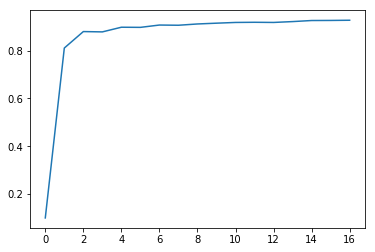

In [90]:
import matplotlib.pyplot as plt
plt.plot(train_acc_list)
plt.show()

In [91]:
l =[]
for i in range(len(test_acc_list)):
    l.append(i)

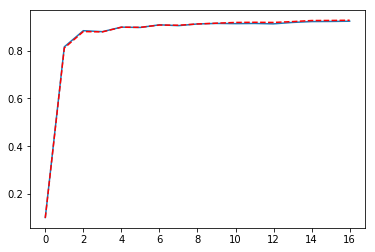

In [92]:
plt.plot(l,test_acc_list,l,train_acc_list,'--r')
plt.show()